In [674]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

In [675]:
# read Iris data set

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
#df = pd.read_csv('iris.csv', header = None)
df.tail()

IA = df.iloc[:,:].values
for i_ in range(0,len(df),1):
    print(i_, IA[i_,:])

Cl = IA[:,4]

0 [5.1 3.5 1.4 0.2 'Iris-setosa']
1 [4.9 3.0 1.4 0.2 'Iris-setosa']
2 [4.7 3.2 1.3 0.2 'Iris-setosa']
3 [4.6 3.1 1.5 0.2 'Iris-setosa']
4 [5.0 3.6 1.4 0.2 'Iris-setosa']
5 [5.4 3.9 1.7 0.4 'Iris-setosa']
6 [4.6 3.4 1.4 0.3 'Iris-setosa']
7 [5.0 3.4 1.5 0.2 'Iris-setosa']
8 [4.4 2.9 1.4 0.2 'Iris-setosa']
9 [4.9 3.1 1.5 0.1 'Iris-setosa']
10 [5.4 3.7 1.5 0.2 'Iris-setosa']
11 [4.8 3.4 1.6 0.2 'Iris-setosa']
12 [4.8 3.0 1.4 0.1 'Iris-setosa']
13 [4.3 3.0 1.1 0.1 'Iris-setosa']
14 [5.8 4.0 1.2 0.2 'Iris-setosa']
15 [5.7 4.4 1.5 0.4 'Iris-setosa']
16 [5.4 3.9 1.3 0.4 'Iris-setosa']
17 [5.1 3.5 1.4 0.3 'Iris-setosa']
18 [5.7 3.8 1.7 0.3 'Iris-setosa']
19 [5.1 3.8 1.5 0.3 'Iris-setosa']
20 [5.4 3.4 1.7 0.2 'Iris-setosa']
21 [5.1 3.7 1.5 0.4 'Iris-setosa']
22 [4.6 3.6 1.0 0.2 'Iris-setosa']
23 [5.1 3.3 1.7 0.5 'Iris-setosa']
24 [4.8 3.4 1.9 0.2 'Iris-setosa']
25 [5.0 3.0 1.6 0.2 'Iris-setosa']
26 [5.0 3.4 1.6 0.4 'Iris-setosa']
27 [5.2 3.5 1.5 0.2 'Iris-setosa']
28 [5.2 3.4 1.4 0.2 'Iris-seto

In [676]:
# get Iris classifications

IC = np.unique(IA[:,4])
print (IC)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [677]:
pltC = ('red', 'blue', 'green')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print(IC[i], pltC[i], pltM[i])
          

Iris-setosa red o
Iris-versicolor blue x
Iris-virginica green *


In [678]:
# setup Iris feature lablels

IrisF=("sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm")
for i in range(0,4):
    print(IrisF[i])


sepal length in cm
sepal width in cm
petal length in cm
petal width in cm


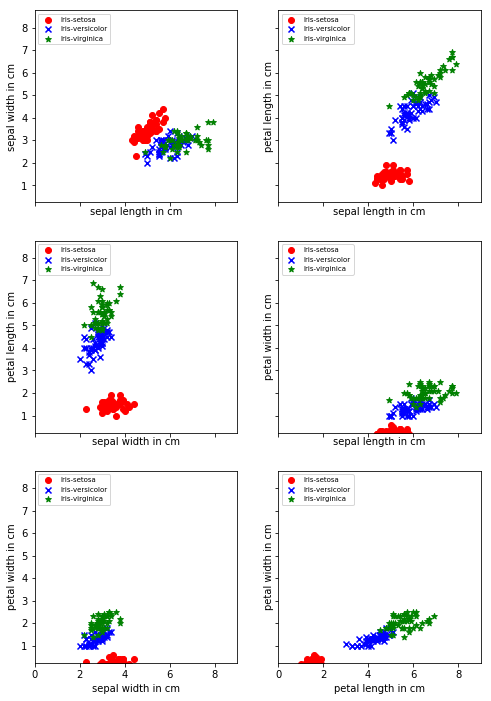

In [679]:
# plot classifications of all pairs of features 

plt.close('all')
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (8,12), sharex=True, sharey=True)


i = 0
k = 0
k1 = 0
k2 = 0
while i < 4:
    yF = IrisF[i]
    j = 0
    while j < i:
        k1 = np.int(k/2)
        k2 = np.mod(k,2)
        xF = IrisF[j]
        
        ax[k1,k2].scatter(x=IA[Cl == IC[0], j], y=IA[Cl == IC[0], i], color=pltC[0], 
                          marker=pltM[0], label=IC[0])
        ax[k1,k2].scatter(x=IA[Cl == IC[1], j], y=IA[Cl == IC[1], i], color=pltC[1], 
                          marker=pltM[1], label=IC[1])
        ax[k1,k2].scatter(x=IA[Cl == IC[2], j], y=IA[Cl == IC[2], i], color=pltC[2], 
                          marker=pltM[2], label=IC[2])
        ax[k1,k2].set(aspect='equal')
        ax[k1,k2].set_xlim([0,9])
        ax[k1,k2].set_ylim([0,9])
        ax[k1,k2].set_xlabel(xF)
        ax[k1,k2].set_ylabel(yF)
        ax[k1,k2].legend(loc='upper left', fontsize='x-small')
        j += 1
        k += 1
    i += 1
plt.show()    

In [680]:
# focus on classification of "setosa" and "versicolor", class indexes 0 and 1
# set to 1 and -1 in class array
cdx = np.array([0,1])   
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
fdx = np.array([0,2])

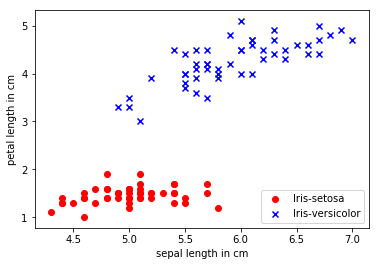

In [681]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        
        NC[j] = 1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    i += 1

plt.close('all')
plt.scatter(x = NF[NC == 1, 0], y = NF[NC == 1, 1], color=pltC[cdx[0]], 
            marker=pltM[cdx[0]], label=IC[cdx[0]])
plt.scatter(x = NF[NC == -1, 0], y = NF[NC == -1, 1], color=pltC[cdx[1]], 
            marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx[0]])
plt.ylabel(IrisF[fdx[1]])
plt.legend(loc='lower right')
plt.show()

In [682]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Code from "Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015,
    with modifications.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """ Calculate net input """
        return (np.dot(X, self.w_[1:]) + self.w_[0])

    def activation(self, X):
        """ Compute linear activation """
        return self.net_input(X)

    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(X) >= 0.0, 1, -1) 
    
    def accuracy(self, X, y):
        """ Return accuracy of the model """
        return (1.0 - abs(y - self.predict(X)).sum() / (2.0 * y.size))
        

In [683]:
# focus on classification of "setosa" and "versicolor", class indexes 0 and 1; 
# set to 1 and -1 in class array
cdx = np.array([0,1])   
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
fdx = np.array([0,2])

In [684]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    i += 1

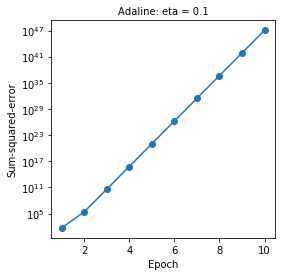

In [685]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.1', fontsize ='medium')
plt.show()

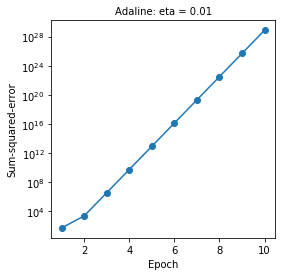

In [686]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.01', fontsize ='medium')
plt.show()

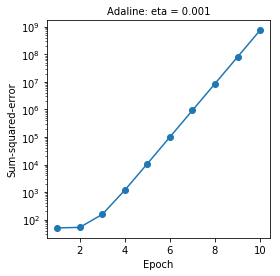

In [687]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.001', fontsize ='medium')
plt.show()

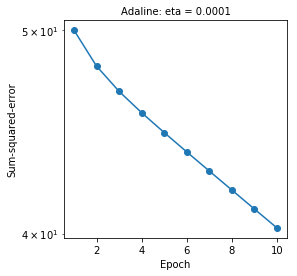

In [688]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show()

In [689]:
# Standardize Inputs

NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

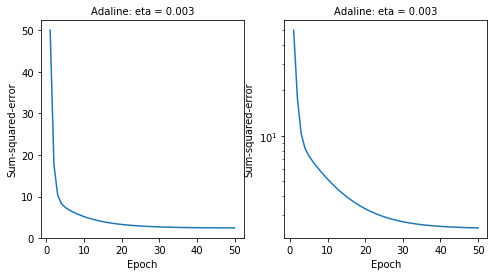

In [690]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

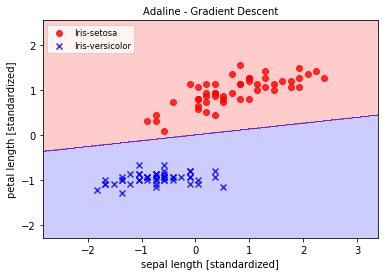

In [691]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup color map
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=pltC[cdx[idx]],
                    marker=pltM[cdx[idx]], label=IC[cdx[idx]])

plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [692]:
print(ada.accuracy(NF_Std, NC))

1.0


In [693]:
# Now we'll try it with classes that are not linearly separable

In [694]:
# focus on classification of "versicolor" and "verginica", class indexes 1 and 2
# set to 1 and -1 in class array
cdx = np.array([1,2])   
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
fdx = np.array([0,2])

In [695]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    i += 1

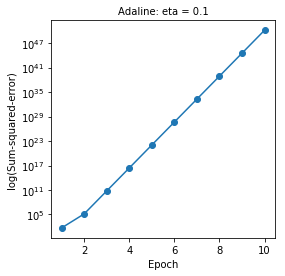

In [696]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('log(Sum-squared-error)')
ax.set_title('Adaline: eta = 0.1', fontsize ='medium')
plt.show()

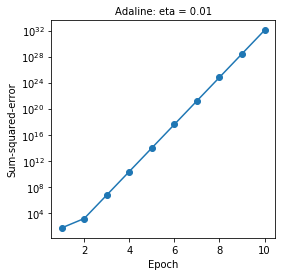

In [697]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.01', fontsize ='medium')
plt.show()

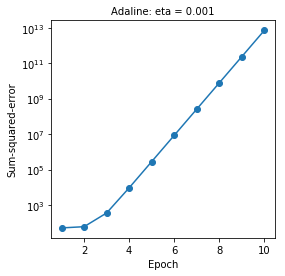

In [698]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.001', fontsize ='medium')
plt.show()

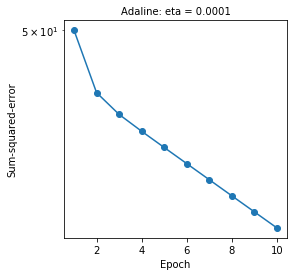

In [699]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show()

In [700]:
# Standardize Inputs

NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

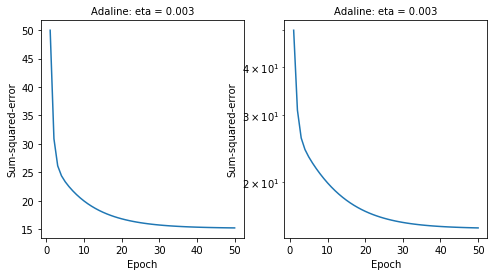

In [701]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [702]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    colors = ('blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=pltC[cdx[idx]],
                    marker=pltM[cdx[idx]], label=IC[cdx[idx]])

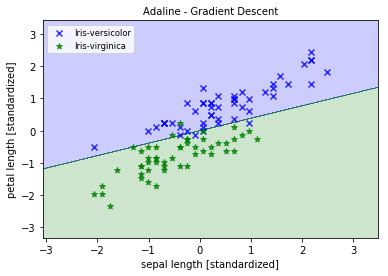

In [703]:
plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [704]:
print(ada.accuracy(NF_Std, NC))

0.94


# -------------------------------Assignment for Week 4----------------------------------
## -------------------------------------------Pooneet Thaper-------------------------------------------

In [705]:
# Pooneet Thaper
# Professor Grimmelmann
# CSC 59929

# Assignment for Week 4:

# Linearly Nonseparable Binary Classification Chosen:
    # Classes: versicolor (1) and virginica (2)

cdx = np.array([1,2])

# Features:
    # 0: sepal length in cm
    # 1: sepal width in cm
    # 2: petal length in cm
    # 3: petal width in cm

# Cases (in order shown below):
    # Two Feature Cases:
        # sepal length (0) and sepal width (1)
        # sepal length (0) and petal length (2)
        # sepal length (0) and petal width (3)
        # sepal width (1) and petal length (2)
        # sepal width (1) and petal width (2)
        # petal length (2) and petal width (3)
    # Three Feature Cases:
        # sepal length (0), sepal width (1), and petal length (2)
        # sepal length (0), sepal width (1), and petal width (3)
        # sepal length (0), petal length (2), and petal width (3)
        # sepal width (1), petal length (2), and petal width (3)
    # Four Feature Case:
        # sepal length (0), sepal width (1), petal length (2), and petal width (3)
        
# Format for each case:
#   1. Get features and classes for all samples in chosen classes
#   2. Visualize features and normalized features
#   3. Train Adaline classifier with raw features and show sum-squared-error for eta=[0.1, 0.01, 0.001, 0.0001]
#   4. Train Adaline classifier (normalized features, eta=0.003) and plot cost vs iteration (linear and log scale)
#   5. Visualize decision boundary on each pair of features (only for two features)
#   6. Print accuracy for the Adaline classifier trained on normalized features and append entry to table

# List to keep records on performance of each system
Records = []
case_num = 0

In [706]:
# Helper functions declared before cases and generalized for arbitrary number of features

def get_class_labels_and_features():
    i = 0
    numCl = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:
            numCl += 1
        if Cl[i] == IC[cdx[1]]:
            numCl += 1    
        i += 1  

    NC = np.zeros((numCl))
    NF = np.zeros((numCl, len(fdx)))

    i = 0
    j = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:        
            NC[j] = 1
            for k in range(len(fdx)):
                NF[j,k] = IA[i,fdx[k]]
            j += 1
        if Cl[i] == IC[cdx[1]]:      
            NC[j] = -1
            for k in range(len(fdx)):
                NF[j,k] = IA[i,fdx[k]]
            j += 1
        i += 1
    return (NC, NF)

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01, is_sub_plot=False, plot=plt, selected=[0,1]):
    X = np.vstack((X[:,selected[0]], X[:,selected[1]])).T
    # setup marker generator and color map
    colors = ('blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plot.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plot.xlim(xx1.min(), xx1.max())
    plot.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plot.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=pltC[cdx[idx]],
                    marker=pltM[cdx[idx]], label=IC[cdx[idx]])
    if (is_sub_plot):
        plot.set_title('Adaline - Gradient Descent', fontsize='medium')
        plot.set_xlabel('{} [standardized]'.format(IrisF[fdx[0]]))
        plot.set_ylabel('{} [standardized]'.format(IrisF[fdx[1]]))
    else:
        plot.title('Adaline - Gradient Descent', fontsize='medium')
        plot.xlabel('{} [standardized]'.format(IrisF[fdx[0]]))
        plot.ylabel('{} [standardized]'.format(IrisF[fdx[1]]))
    plot.legend(loc='upper left', fontsize='small')
        

def standardize_features(NF, NC):
    NF_Std = np.copy(NF)
    for i in range(len(fdx)):
        NF_Std[:,i] = (NF[:,i] - NF[:,i].mean()) / NF[:,i].std()
    return NF_Std

def plot_features(sub_plot, NF, NC, title, selected=[0,1]):
    NF = np.vstack((NF[:,selected[0]], NF[:,selected[1]])).T
    sub_plot.scatter(x = NF[NC == 1, 0], y = NF[NC == 1, 1], color=pltC[cdx[0]], 
                marker=pltM[cdx[0]], label=IC[cdx[0]])
    sub_plot.scatter(x = NF[NC == -1, 0], y = NF[NC == -1, 1], color=pltC[cdx[1]], 
                marker=pltM[cdx[1]], label=IC[cdx[1]])
    sub_plot.set_xlabel(IrisF[fdx[selected[0]]])
    sub_plot.set_ylabel(IrisF[fdx[selected[1]]])
    sub_plot.legend(loc='lower right')
    sub_plot.set_title(title)

def plot_raw_standardized():
    f = []
    i = 0;
    j = 1;
    while j<len(fdx):
        f.append([i,j])
        j+=1
        if (j==len(fdx)):
            i+=1
            j = i+1

    fig, ax = plt.subplots(nrows=len(f), ncols=2, figsize = (12,4*len(f)))
    fig.subplots_adjust(hspace=.4)

    for i in range(len(f)):
        plot_features(ax[i, 0], NF, NC, 'Raw feature values', f[i])
        plot_features(ax[i, 1], NF_Std, NC, 'Normalized feature values', f[i])



## -------------------------------------------Two Feature Cases-------------------------------------------

In [707]:
# Two Feature Cases:
# sepal length (0) and sepal width (1)
fdx = np.array([0,1])
# Get Class Labels and Selected Features for each sample
NC, NF = get_class_labels_and_features()

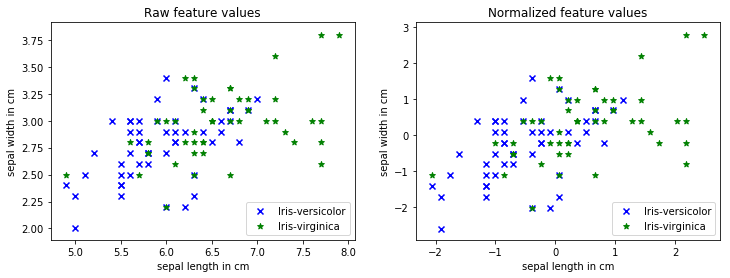

In [708]:
# Standardize Inputs

NF_Std = standardize_features(NF, NC)

plt.close('all')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,4))
plot_features(ax[0], NF, NC, 'Raw feature values')
plot_features(ax[1], NF_Std, NC, 'Normalized feature values')

plt.show()

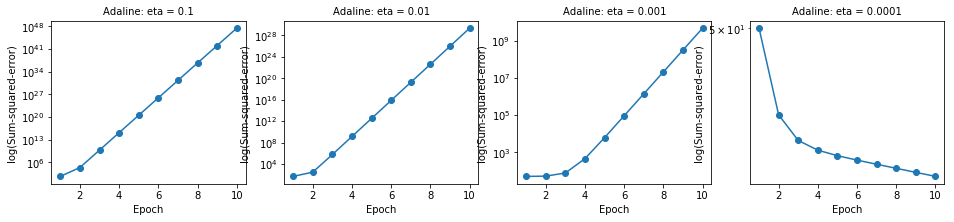

In [709]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,3))
curr_eta = 1
for i in range(len(ax)):
    curr_eta /= 10
    ada = AdalineGD(n_iter=10, eta=curr_eta).fit(NF, NC)
    ax[i].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('log(Sum-squared-error)')
    ax[i].set_title('Adaline: eta = {}'.format(curr_eta), fontsize ='medium')
plt.show()

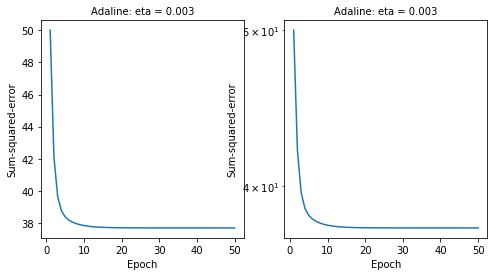

In [710]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

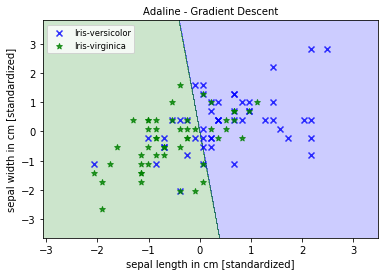

In [711]:
# Plot decision regions

plot_decision_regions(NF_Std, NC, classifier = ada)
plt.show()

In [712]:
acc = ada.accuracy(NF_Std, NC)
Records.append([case_num, len(fdx),np.copy(fdx),acc])
case_num+=1
print(acc)

0.75


In [713]:
# Two Feature Cases:
# sepal length (0) and petal length (2)
fdx = np.array([0,2])
# Get Class Labels and Selected Features for each sample
NC, NF = get_class_labels_and_features()

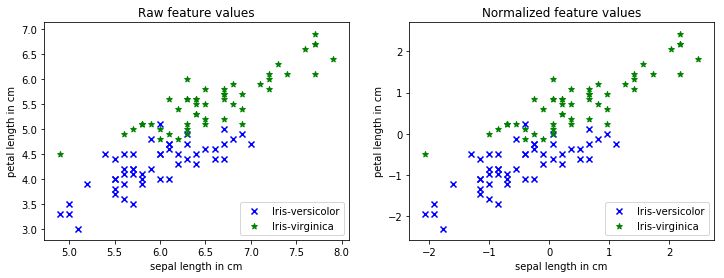

In [714]:
# Standardize Inputs

NF_Std = standardize_features(NF, NC)

plt.close('all')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,4))
plot_features(ax[0], NF, NC, 'Raw feature values')
plot_features(ax[1], NF_Std, NC, 'Normalized feature values')

plt.show()

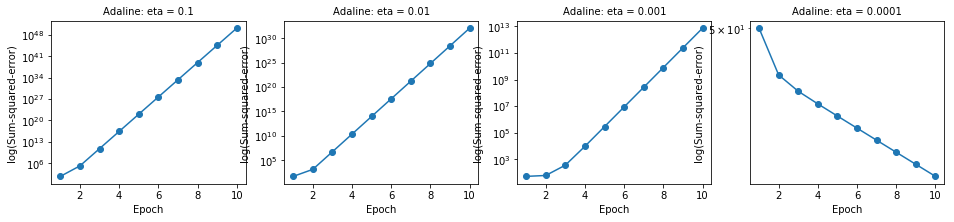

In [715]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,3))
curr_eta = 1
for i in range(len(ax)):
    curr_eta /= 10
    ada = AdalineGD(n_iter=10, eta=curr_eta).fit(NF, NC)
    ax[i].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('log(Sum-squared-error)')
    ax[i].set_title('Adaline: eta = {}'.format(curr_eta), fontsize ='medium')
plt.show()

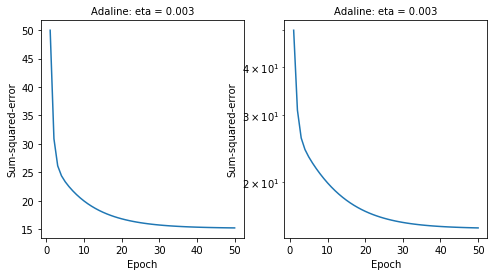

In [716]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

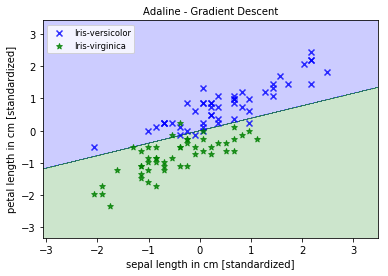

In [717]:
# Plot decision regions

plot_decision_regions(NF_Std, NC, classifier = ada)
plt.show()

In [718]:
acc = ada.accuracy(NF_Std, NC)
Records.append([case_num, len(fdx),np.copy(fdx),acc])
case_num+=1
print(acc)

0.94


In [719]:
# Two Feature Cases:
# sepal length (0) and petal width (3)
fdx = np.array([0,3])
# Get Class Labels and Selected Features for each sample
NC, NF = get_class_labels_and_features()

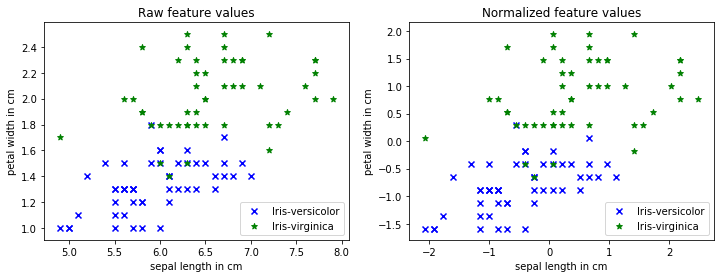

In [720]:
# Standardize Inputs

NF_Std = standardize_features(NF, NC)

plt.close('all')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,4))
plot_features(ax[0], NF, NC, 'Raw feature values')
plot_features(ax[1], NF_Std, NC, 'Normalized feature values')

plt.show()

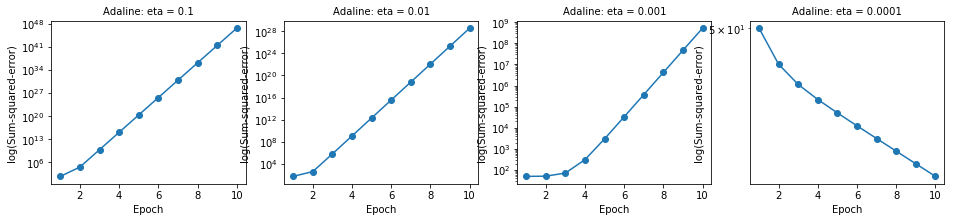

In [721]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,3))
curr_eta = 1
for i in range(len(ax)):
    curr_eta /= 10
    ada = AdalineGD(n_iter=10, eta=curr_eta).fit(NF, NC)
    ax[i].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('log(Sum-squared-error)')
    ax[i].set_title('Adaline: eta = {}'.format(curr_eta), fontsize ='medium')
plt.show()

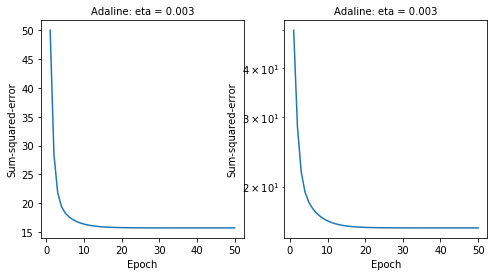

In [722]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

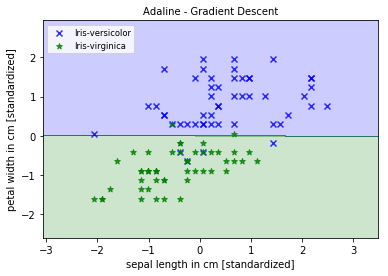

In [723]:
# Plot decision regions

plot_decision_regions(NF_Std, NC, classifier = ada)
plt.show()

In [724]:
acc = ada.accuracy(NF_Std, NC)
Records.append([case_num, len(fdx),np.copy(fdx),acc])
case_num+=1
print(acc)

0.94


In [725]:
# Two Feature Cases:
# sepal width (1) and petal length (2)
fdx = np.array([1,2])
# Get Class Labels and Selected Features for each sample
NC, NF = get_class_labels_and_features()

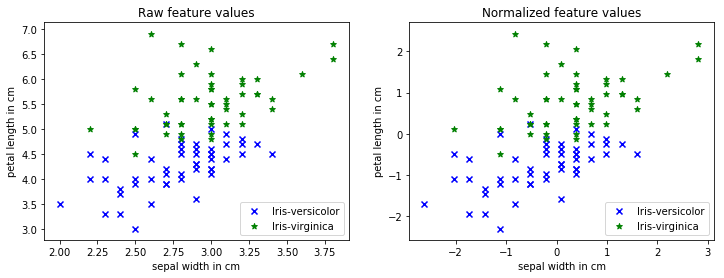

In [726]:
# Standardize Inputs

NF_Std = standardize_features(NF, NC)

plt.close('all')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,4))
plot_features(ax[0], NF, NC, 'Raw feature values')
plot_features(ax[1], NF_Std, NC, 'Normalized feature values')

plt.show()

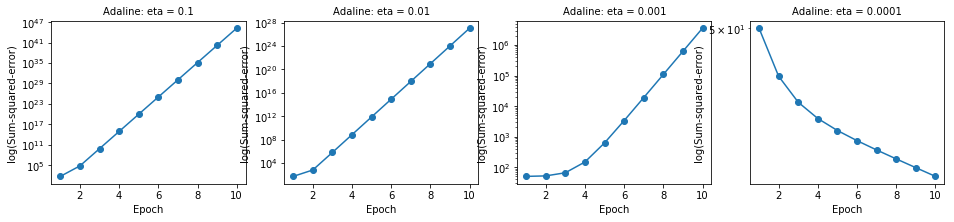

In [727]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,3))
curr_eta = 1
for i in range(len(ax)):
    curr_eta /= 10
    ada = AdalineGD(n_iter=10, eta=curr_eta).fit(NF, NC)
    ax[i].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('log(Sum-squared-error)')
    ax[i].set_title('Adaline: eta = {}'.format(curr_eta), fontsize ='medium')
plt.show()

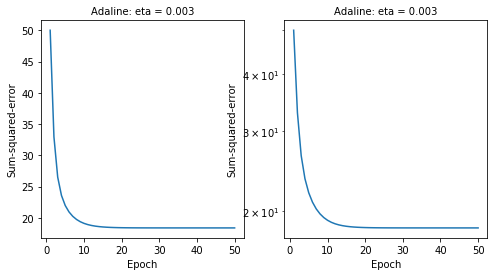

In [728]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

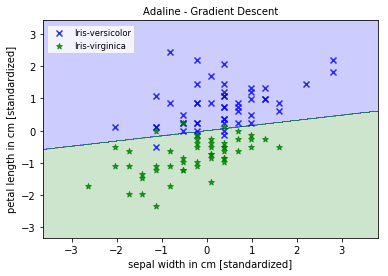

In [729]:
# Plot decision regions

plot_decision_regions(NF_Std, NC, classifier = ada)
plt.show()

In [730]:
acc = ada.accuracy(NF_Std, NC)
Records.append([case_num, len(fdx),np.copy(fdx),acc])
case_num+=1
print(acc)

0.93


In [731]:
# Two Feature Cases:
# sepal width (1) and petal width (3)
fdx = np.array([1,3])
# Get Class Labels and Selected Features for each sample
NC, NF = get_class_labels_and_features()

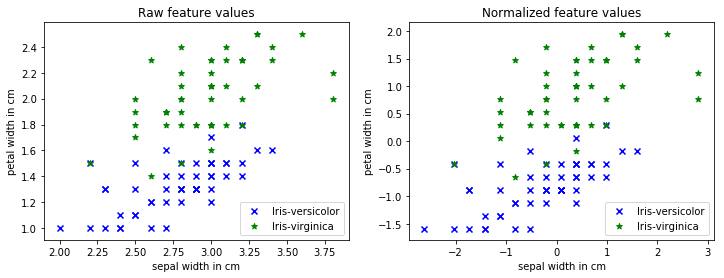

In [732]:
# Standardize Inputs

NF_Std = standardize_features(NF, NC)

plt.close('all')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,4))
plot_features(ax[0], NF, NC, 'Raw feature values')
plot_features(ax[1], NF_Std, NC, 'Normalized feature values')

plt.show()

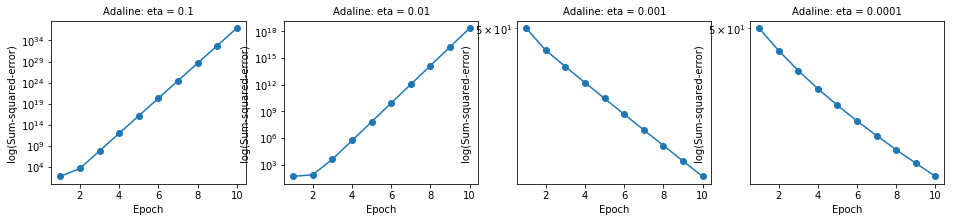

In [733]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,3))
curr_eta = 1
for i in range(len(ax)):
    curr_eta /= 10
    ada = AdalineGD(n_iter=10, eta=curr_eta).fit(NF, NC)
    ax[i].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('log(Sum-squared-error)')
    ax[i].set_title('Adaline: eta = {}'.format(curr_eta), fontsize ='medium')
plt.show()

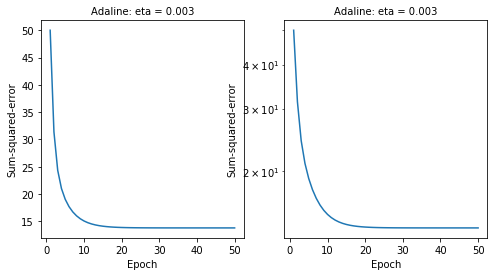

In [734]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

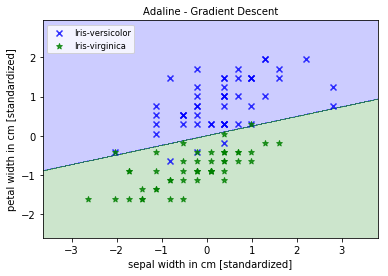

In [735]:
# Plot decision regions

plot_decision_regions(NF_Std, NC, classifier = ada)
plt.show()

In [736]:
acc = ada.accuracy(NF_Std, NC)
Records.append([case_num, len(fdx),np.copy(fdx),acc])
case_num+=1
print(acc)

0.95


In [737]:
# Two Feature Cases:
# petal length (2) and petal width (3)
fdx = np.array([2,3])
# Get Class Labels and Selected Features for each sample
NC, NF = get_class_labels_and_features()

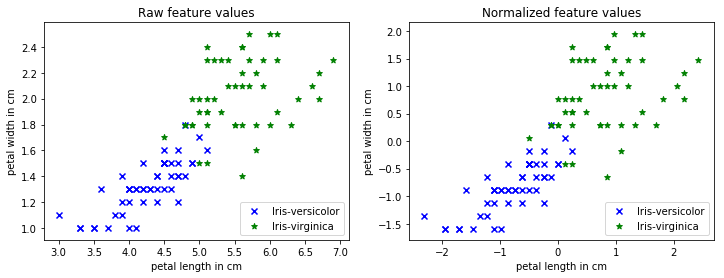

In [738]:
# Standardize Inputs

NF_Std = standardize_features(NF, NC)

plt.close('all')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,4))
plot_features(ax[0], NF, NC, 'Raw feature values')
plot_features(ax[1], NF_Std, NC, 'Normalized feature values')

plt.show()

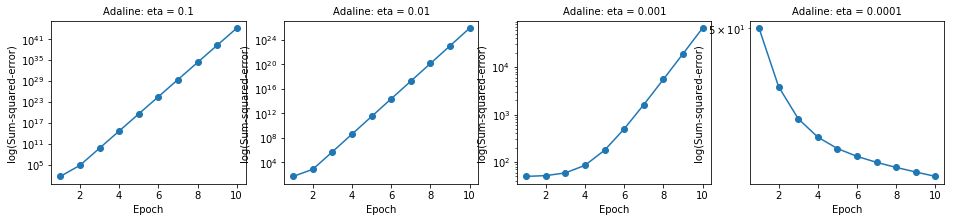

In [739]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,3))
curr_eta = 1
for i in range(len(ax)):
    curr_eta /= 10
    ada = AdalineGD(n_iter=10, eta=curr_eta).fit(NF, NC)
    ax[i].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('log(Sum-squared-error)')
    ax[i].set_title('Adaline: eta = {}'.format(curr_eta), fontsize ='medium')
plt.show()

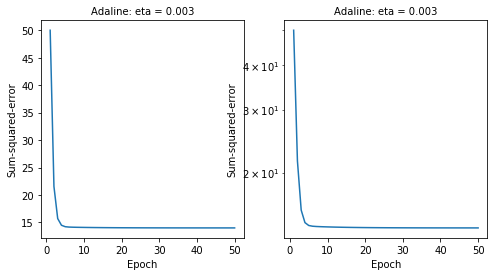

In [740]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

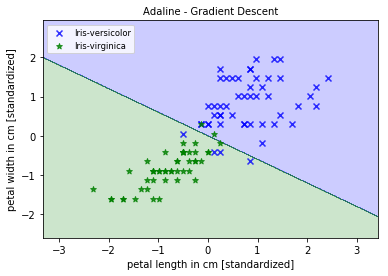

In [741]:
# Plot decision regions

plot_decision_regions(NF_Std, NC, classifier = ada)
plt.show()

In [742]:
acc = ada.accuracy(NF_Std, NC)
Records.append([case_num, len(fdx),np.copy(fdx),acc])
case_num+=1
print(acc)

0.94


## -------------------------------------------Three Feature Cases-----------------------------------------

In [743]:
# Three Feature Cases:
# sepal length (0), sepal width (1) and petal length (2)
fdx = np.array([0,1,2])
# Get Class Labels and Selected Features for each sample
NC, NF = get_class_labels_and_features()

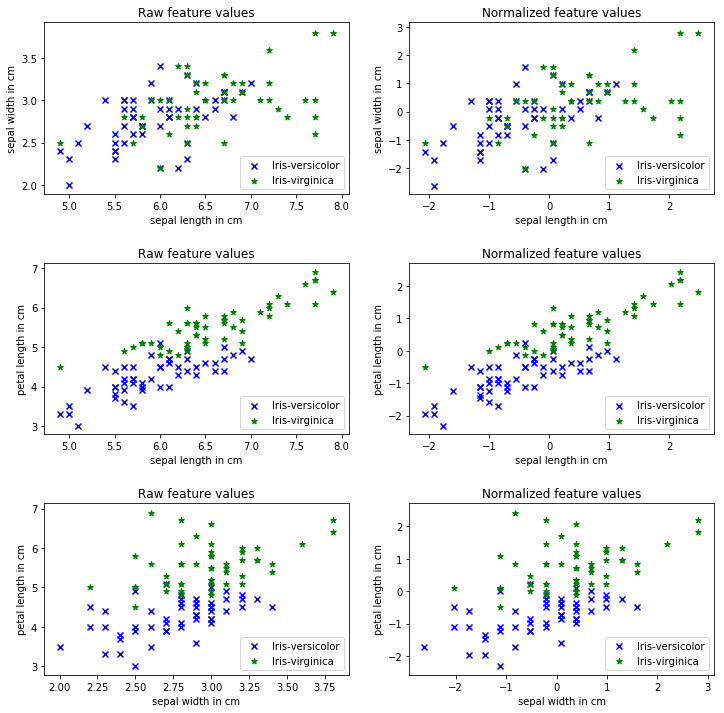

In [744]:
# Standardize Inputs

NF_Std = standardize_features(NF, NC)

plt.close('all')
plot_raw_standardized()

plt.show()

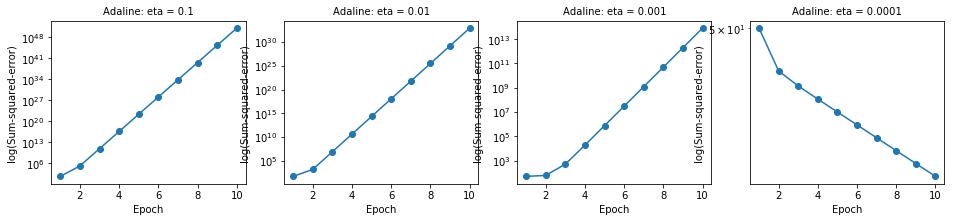

In [745]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,3))
curr_eta = 1
for i in range(len(ax)):
    curr_eta /= 10
    ada = AdalineGD(n_iter=10, eta=curr_eta).fit(NF, NC)
    ax[i].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('log(Sum-squared-error)')
    ax[i].set_title('Adaline: eta = {}'.format(curr_eta), fontsize ='medium')
plt.show()

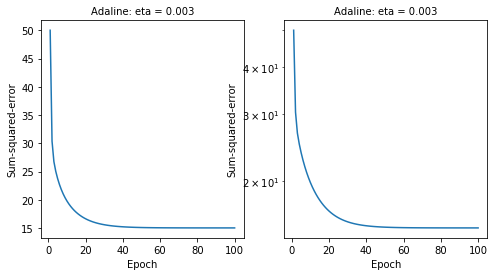

In [746]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=100, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [747]:
acc = ada.accuracy(NF_Std, NC)
Records.append([case_num, len(fdx),np.copy(fdx),acc])
case_num+=1
print(acc)

0.93


In [748]:
# Three Feature Cases:
# sepal length (0), sepal width (1) and petal width (3)
fdx = np.array([0,1,3])
# Get Class Labels and Selected Features for each sample
NC, NF = get_class_labels_and_features()

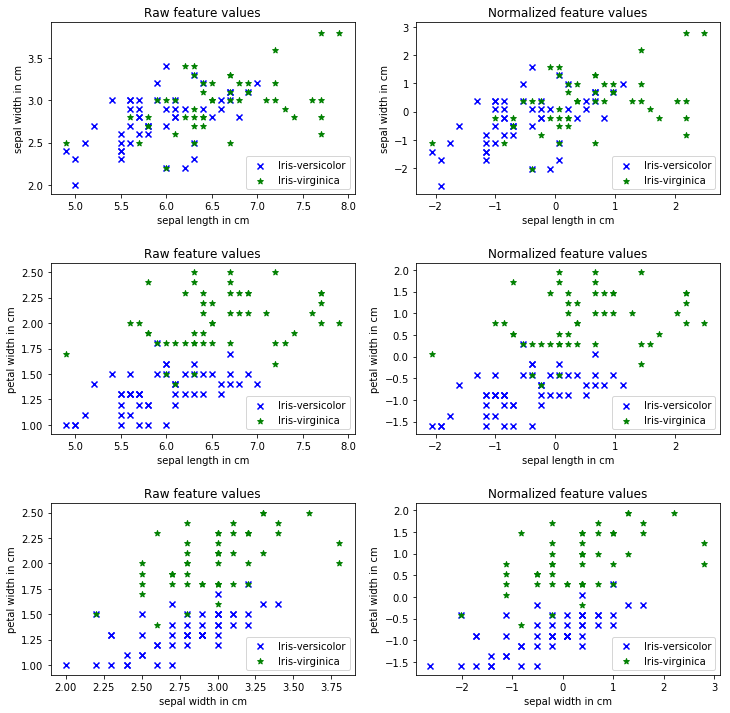

In [749]:
# Standardize Inputs

NF_Std = standardize_features(NF, NC)

plt.close('all')
plot_raw_standardized()

plt.show()

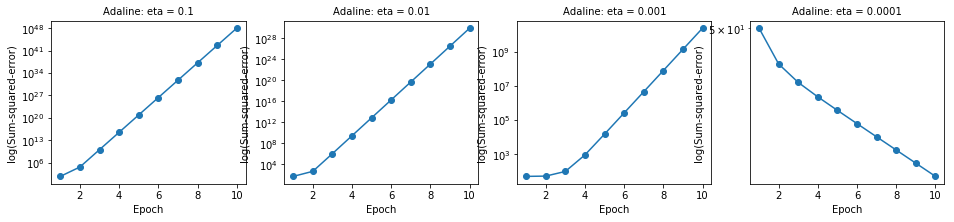

In [750]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,3))
curr_eta = 1
for i in range(len(ax)):
    curr_eta /= 10
    ada = AdalineGD(n_iter=10, eta=curr_eta).fit(NF, NC)
    ax[i].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('log(Sum-squared-error)')
    ax[i].set_title('Adaline: eta = {}'.format(curr_eta), fontsize ='medium')
plt.show()

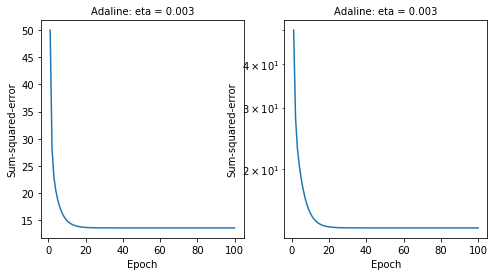

In [751]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=100, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [752]:
acc = ada.accuracy(NF_Std, NC)
Records.append([case_num, len(fdx),np.copy(fdx),acc])
case_num+=1
print(acc)

0.95


In [753]:
# Three Feature Cases:
# sepal length (0), petal length (2) and petal width (3)
fdx = np.array([0,2,3])
# Get Class Labels and Selected Features for each sample
NC, NF = get_class_labels_and_features()

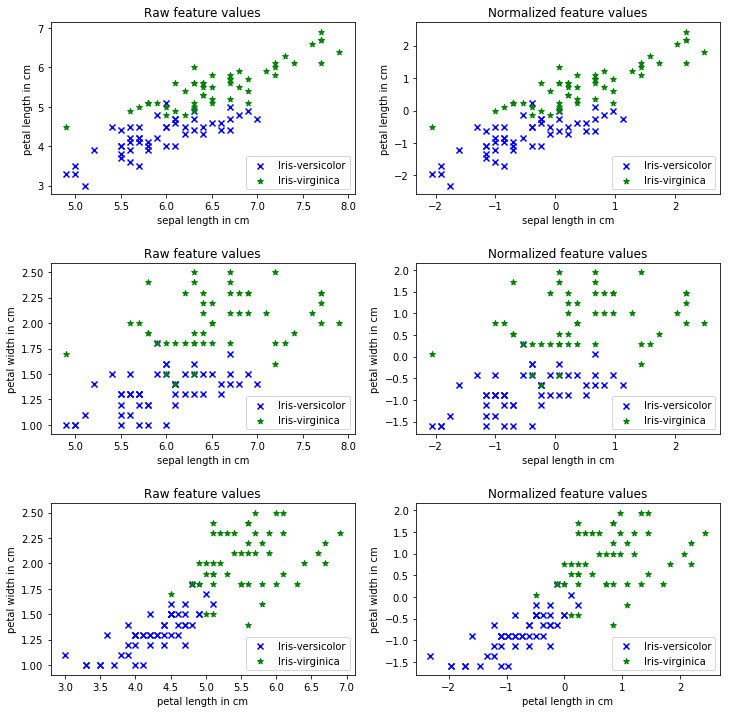

In [754]:
# Standardize Inputs

NF_Std = standardize_features(NF, NC)

plt.close('all')
plot_raw_standardized()

plt.show()

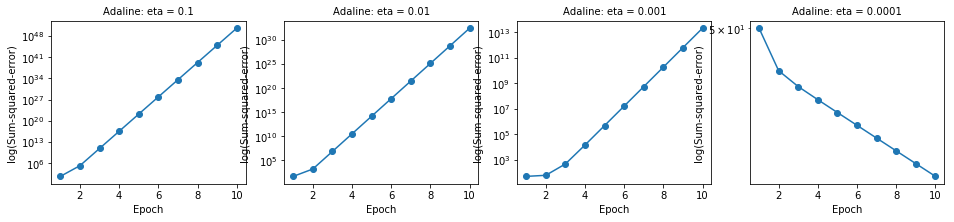

In [755]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,3))
curr_eta = 1
for i in range(len(ax)):
    curr_eta /= 10
    ada = AdalineGD(n_iter=10, eta=curr_eta).fit(NF, NC)
    ax[i].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('log(Sum-squared-error)')
    ax[i].set_title('Adaline: eta = {}'.format(curr_eta), fontsize ='medium')
plt.show()

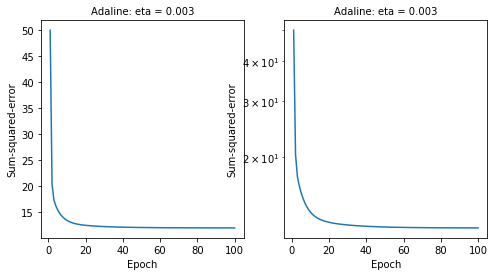

In [756]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=100, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [757]:
acc = ada.accuracy(NF_Std, NC)
Records.append([case_num, len(fdx),np.copy(fdx),acc])
case_num+=1
print(acc)

0.97


In [758]:
# Three Feature Cases:
# sepal width (1), petal length (2) and petal width (3)
fdx = np.array([1,2,3])
# Get Class Labels and Selected Features for each sample
NC, NF = get_class_labels_and_features()

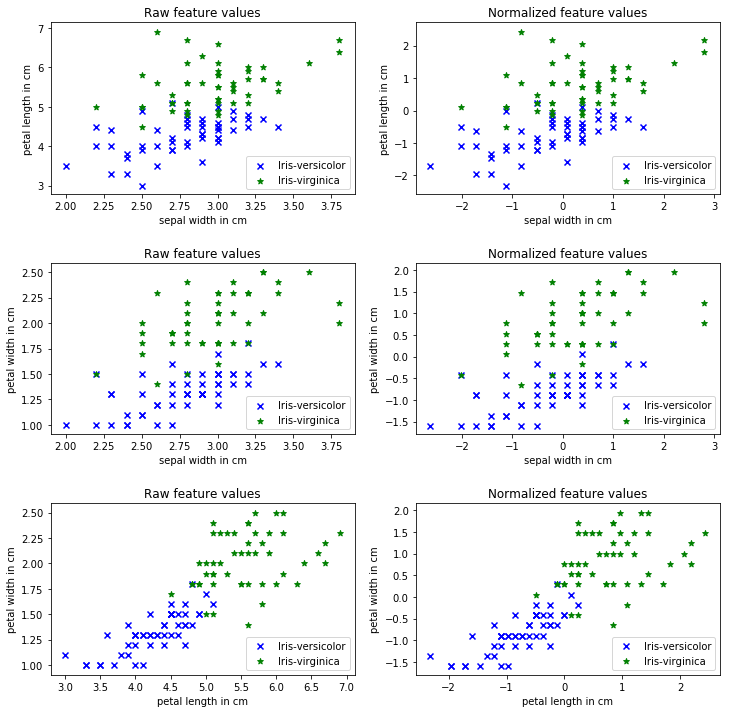

In [759]:
# Standardize Inputs

NF_Std = standardize_features(NF, NC)

plt.close('all')
plot_raw_standardized()

plt.show()

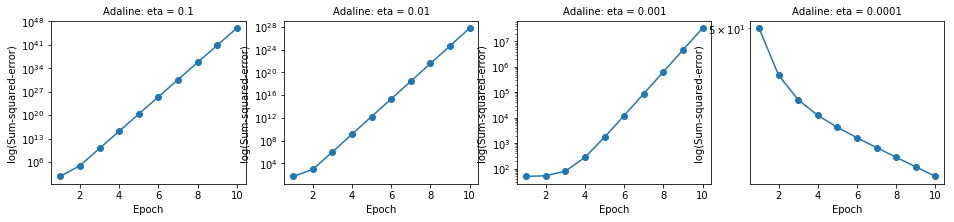

In [760]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,3))
curr_eta = 1
for i in range(len(ax)):
    curr_eta /= 10
    ada = AdalineGD(n_iter=10, eta=curr_eta).fit(NF, NC)
    ax[i].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('log(Sum-squared-error)')
    ax[i].set_title('Adaline: eta = {}'.format(curr_eta), fontsize ='medium')
plt.show()

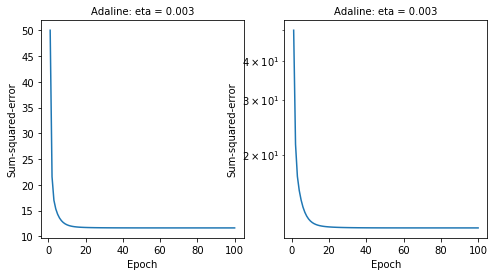

In [761]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=100, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [762]:
acc = ada.accuracy(NF_Std, NC)
Records.append([case_num, len(fdx),np.copy(fdx),acc])
case_num+=1
print(acc)

0.96


## -------------------------------------------Four Feature Case-------------------------------------------

In [763]:
# Four Feature Cases:
# sepal length (0), sepal width (1), petal length (2) and petal width (3)
fdx = np.array([0,1,2,3])
# Get Class Labels and Selected Features for each sample
NC, NF = get_class_labels_and_features()

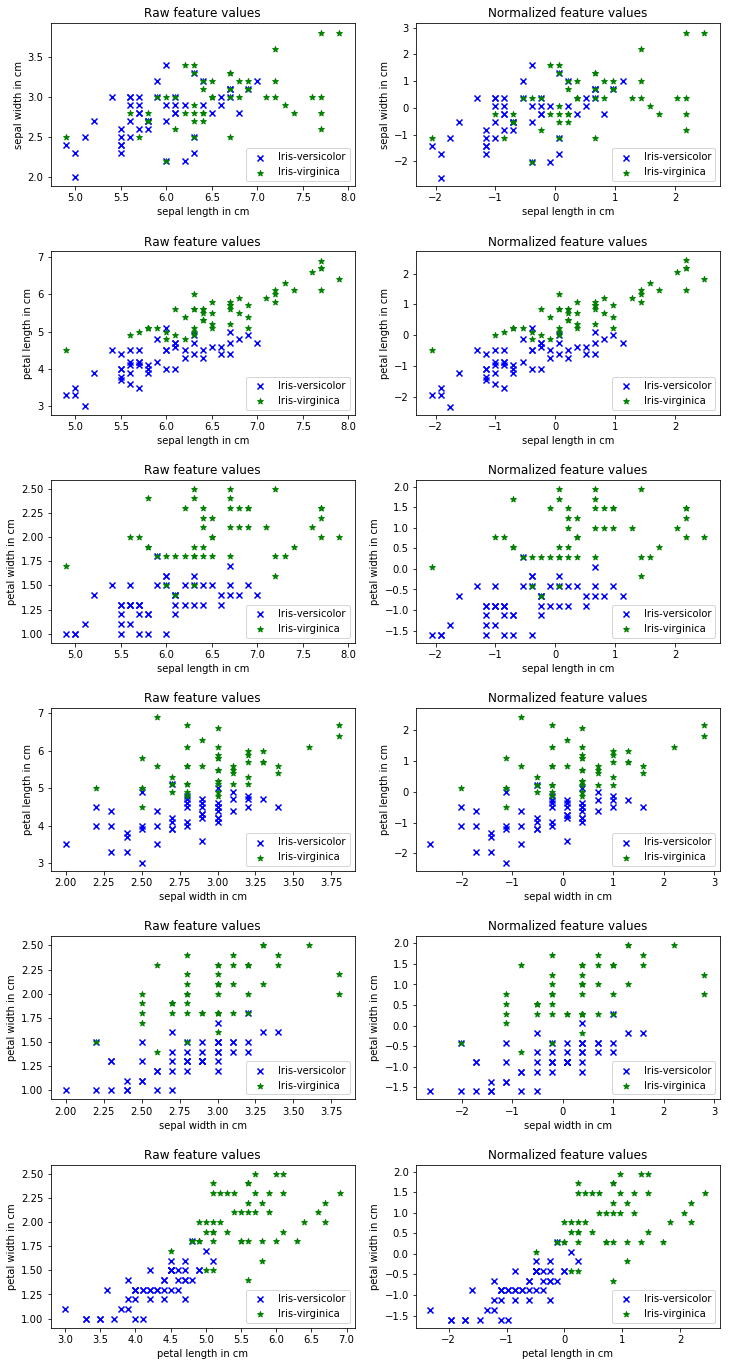

In [764]:
# Standardize Inputs

NF_Std = standardize_features(NF, NC)

plt.close('all')
plot_raw_standardized()

plt.show()

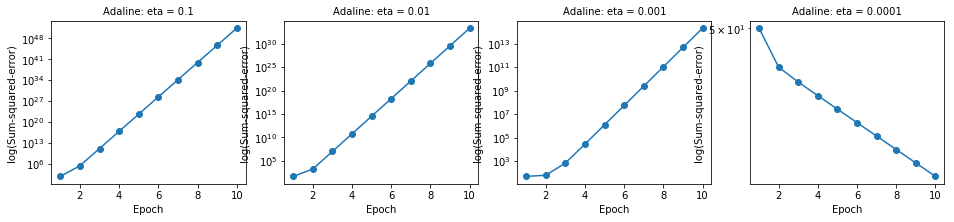

In [765]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,3))
curr_eta = 1
for i in range(len(ax)):
    curr_eta /= 10
    ada = AdalineGD(n_iter=10, eta=curr_eta).fit(NF, NC)
    ax[i].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('log(Sum-squared-error)')
    ax[i].set_title('Adaline: eta = {}'.format(curr_eta), fontsize ='medium')
plt.show()

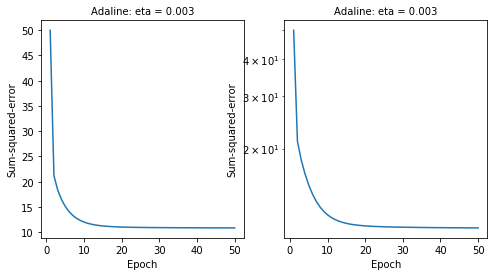

In [766]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [767]:
acc = ada.accuracy(NF_Std, NC)
Records.append([case_num, len(fdx),np.copy(fdx),acc])
case_num+=1
print(acc)

0.97


## --------------------------------------------Summary-----------------------------------------------------

In [768]:
from prettytable import PrettyTable
t = PrettyTable(['Case Num', 'Num Features', 'Features Used', 'Accuracy'])
for record in Records:
    t.add_row(record)
print(t)

+----------+--------------+---------------+----------+
| Case Num | Num Features | Features Used | Accuracy |
+----------+--------------+---------------+----------+
|    0     |      2       |     [0 1]     |   0.75   |
|    1     |      2       |     [0 2]     |   0.94   |
|    2     |      2       |     [0 3]     |   0.94   |
|    3     |      2       |     [1 2]     |   0.93   |
|    4     |      2       |     [1 3]     |   0.95   |
|    5     |      2       |     [2 3]     |   0.94   |
|    6     |      3       |    [0 1 2]    |   0.93   |
|    7     |      3       |    [0 1 3]    |   0.95   |
|    8     |      3       |    [0 2 3]    |   0.97   |
|    9     |      3       |    [1 2 3]    |   0.96   |
|    10    |      4       |   [0 1 2 3]   |   0.97   |
+----------+--------------+---------------+----------+


In [769]:
def calculate_avg_max(num_features):
    sum_acc = 0
    max_acc = 0
    count = 0
    for i in range(len(Records)):
        if Records[i][1] == num_features:
            count += 1
            sum_acc += Records[i][3]
            if Records[i][3] > max_acc:
                max_acc = Records[i][3]
    return (sum_acc/count, max_acc)

In [770]:
two_avg, two_max = calculate_avg_max(2)
three_avg, three_max = calculate_avg_max(3)
four_avg, four_max = calculate_avg_max(4)
print("Accuracy:")
print("Two features: \n\tAverage: {}\n\tMax: {}".format(two_avg, two_max))
print("Three features: \n\tAverage: {}\n\tMax: {}".format(three_avg, three_max))
print("Four features: \n\tAverage: {}\n\tMax: {}".format(four_avg, four_max))

Accuracy:
Two features: 
	Average: 0.9083333333333332
	Max: 0.95
Three features: 
	Average: 0.9524999999999999
	Max: 0.97
Four features: 
	Average: 0.97
	Max: 0.97


In [771]:
# Discussion:
#     In this assignment, I chose to classify between Iris Virginica and Iris Versicolor because they were their values
# were not linearly separable for most pairs of features. The results of the eleven systems seem to show a general 
# improvement when using more features. The average accuracy increase with number of features. However, similar 
# accuracies were present between models of differing numbers of features possibly due to the quality of the features 
# used. Moreover, within models that utilized the same number of features, the accuracy was spread out, possibly 
# indicating that certain combinations of features may just be better for this particular classification than others.
# For example, when looking at the graph of sepal length and sepal width, there is a lot of overlap between the classes.
# At the same time, all models that used these features together performed the worst among models of the same number of
# features. 